# The $k$-Nearest Neighbors Algorithm

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Naiwen1997/IDNE-577-Machine-Learning/blob/master/Supervised%20Learning/Nonparametric%20Modeling/Lecture%201%20KNN%20Algorithm/KNN.ipynb)


In [115]:
# !pip install ucimlrepo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# import the dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
rice_cammeo_and_osmancik = fetch_ucirepo(id=545) 

# data (as pandas dataframes) 
X = rice_cammeo_and_osmancik.data.features.values
y = rice_cammeo_and_osmancik.data.targets.values

In [116]:
df_var=rice_cammeo_and_osmancik.variables
var_name=df_var['name']

In [117]:
# Standardize the value of X
X=np.array([X[:,i]/X[:,i].max() for i in range(X.shape[1])]).T
# concatenate X and y
data = np.concatenate((X,y),axis=1)
# generate the Dataframe
df=pd.DataFrame(data,columns=var_name)


In [123]:
df['Perimeter']=pd.to_numeric(df['Perimeter'], errors='coerce')
df['Major_Axis_Length']=pd.to_numeric(df['Major_Axis_Length'], errors='coerce')
X=df[['Perimeter', 'Major_Axis_Length']].to_numpy()
y=df['Class'].to_numpy()

train_X, test_X, train_y, test_y=train_test_split(X, y, test_size=0.33, random_state=1)

In [75]:
print(f"The shape of X is {X.shape} \n")
print(f"The shape of y is {y.shape}")

The shape of X is (3810, 2) 

The shape of y is (3810,)


In [76]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

print(f"The distance between point 10 and 67 is {distance(X[10], X[67])}")

The distance between point 10 and 67 is 0.03050701134084289


In [77]:
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    # Create an empty list to store neighbors and distances
    neighbors = []
    
    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        temp_data = [p, label, d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

In [78]:
k_nearest_neighbors(test_X[0], train_X, train_y, 5)

[[array([0.697857237969648, 0.6447251726993181], dtype=object),
  'Osmancik',
  0.0036402320026447162],
 [array([0.7053037596324717, 0.6507015034963024], dtype=object),
  'Osmancik',
  0.007169905641482102],
 [array([0.6906623372577494, 0.650053959136138], dtype=object),
  'Osmancik',
  0.008078811242479698],
 [array([0.7074060352144735, 0.6464608956214132], dtype=object),
  'Osmancik',
  0.009046506445966029],
 [array([0.6926825940059546, 0.639599210826296], dtype=object),
  'Osmancik',
  0.010492676201029697]]

In [79]:
test_y[0]

'Osmancik'

In [80]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

In [81]:
# Test our function 
print(f"Predicted value is {KNN_Predict(test_X[20], train_X, train_y, 5)} \n")
print(f"Real value is {test_y[20]}")

Predicted value is Osmancik 

Real value is Osmancik


In [82]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN_Predict(point, 
                                      training_features, 
                                      training_labels, 
                                      k)
    return error/len(test_features)

In [83]:
classification_error(test_X, test_y, train_X, train_y, 5)

0.08108108108108109

# Choose the optimal value of $K$

In [84]:
possible_K_values=[i for i in range(3,30,2)]
classification_errors=[classification_error(test_X, test_y, train_X, train_y, i) for i in possible_K_values]

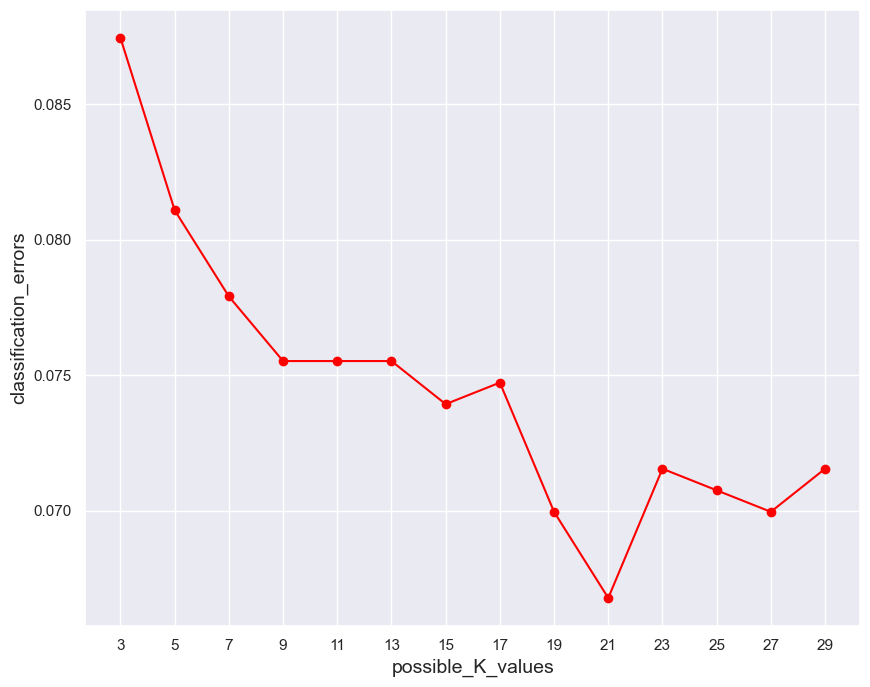

In [85]:
plt.figure(figsize=(10,8))
plt.plot(possible_K_values, classification_errors, color='red', marker='o')
plt.xlabel('possible_K_values', fontsize=14)
plt.ylabel('classification_errors', fontsize=14)
plt.xticks(possible_K_values)
plt.show()

In [86]:
# Use the optimal K value equal to 21

classification_error(test_X, test_y, train_X, train_y, 21)

0.06677265500794913

In [87]:
KNN_Predict(test_X[0],train_X,train_y,21)

'Osmancik'

In [88]:
test_y[0]

'Osmancik'

Use Scikit-Learning to implement the K-Nearest Neighbors Algorithm

In [126]:
from sklearn.neighbors import KNeighborsClassifier

def make_labels(y):
    if y=='Cammeo':
        return 1
    else: 
        return 0
    
y=df['Class'].map(make_labels).to_numpy()
train_X, test_X, train_y, test_y=train_test_split(X, y, test_size=0.33, random_state=1)

clf=KNeighborsClassifier(n_neighbors=21)
clf.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=21)

In [90]:
pred_y=clf.predict(test_X)
print(sum(test_y==pred_y)/len(test_y))

0.9332273449920508


In [91]:
clf.score(test_X, test_y)

0.9332273449920508

In [132]:
X

array([[0.95830582, 0.96125434],
       [0.90129387, 0.86197078],
       [0.91371261, 0.89580492],
       ...,
       [0.80682329, 0.7680538 ],
       [0.7152883 , 0.6744222 ],
       [0.73792133, 0.67394224]])

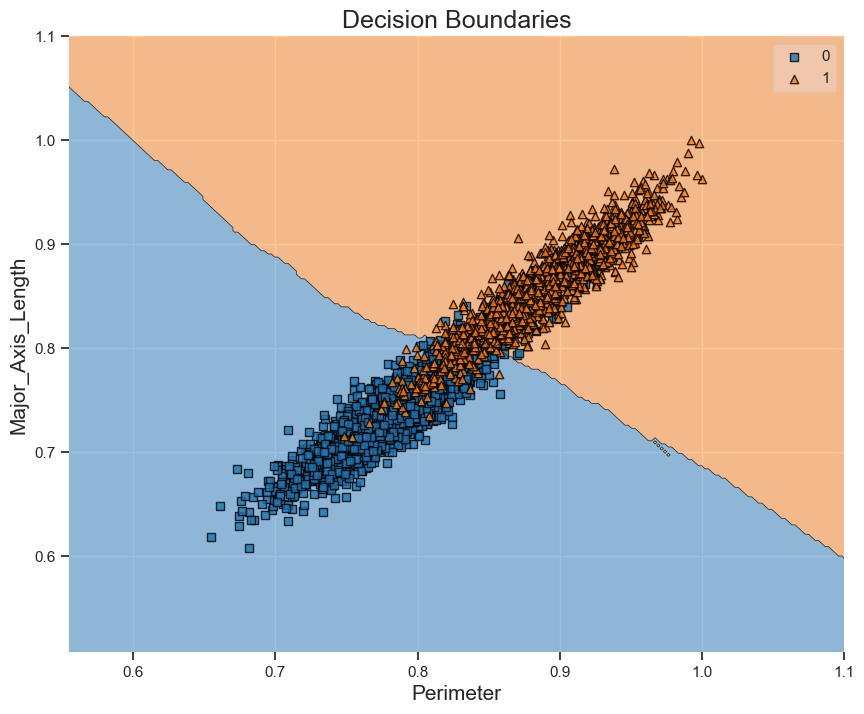

In [134]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf)
plt.xlabel("Perimeter", fontsize = 15)
plt.ylabel("Major_Axis_Length", fontsize = 15)
plt.title("Decision Boundaries", fontsize = 18)
plt.xlim([X[:,0].min()-0.1,X[:,0].max()+0.1])
plt.ylim([X[:,1].min()-0.1,X[:,1].max()+0.1])
plt.show()

# Conclusion and Discussion

The model evaluation shows that $k$-Nearest Neighbors Algorithm is capable of predicting the type of rice with a very high accuracy. A summary of the results obtained is:

1. The $k$-Nearest Neighbors Algorithm is able to achieve a testing accuracy of 92% when k is equal to 5.
2. The $k$-Nearest Neighbors Algorithm is able to achieve a testing accuracy of 93.3% when k is optimal and equal to 21.